In [1]:
import pandas

input_dataframe = pandas.read_csv("train.csv")

In [2]:
labels = input_dataframe['Survived']

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
input_dataframe["Embarked"] = le.fit_transform(input_dataframe["Embarked"].astype(str))
input_dataframe["Cabin"] = le.fit_transform(input_dataframe["Cabin"].astype(str))
input_dataframe["Sex"] = le.fit_transform(input_dataframe["Sex"].astype(str))
input_dataframe["Age"] = input_dataframe["Age"].fillna(-1)
input_dataframe.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2


In [4]:
matX = input_dataframe[["Pclass","Sex", "Age", "SibSp", "Parch","Fare", "Cabin", "Embarked"]]
matX.head(4)             

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,147,2
1,1,0,38.0,1,0,71.2833,81,0
2,3,0,26.0,0,0,7.9250,147,2
3,1,0,35.0,1,0,53.1000,55,2


In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(matX, labels)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [6]:
test_dataframe = pandas.read_csv("test.csv")

In [7]:
test_dataframe["Embarked"] = le.fit_transform(test_dataframe["Embarked"].astype(str))
test_dataframe["Cabin"] = le.fit_transform(test_dataframe["Cabin"].astype(str))
test_dataframe["Sex"] = le.fit_transform(test_dataframe["Sex"].astype(str))
test_dataframe["Age"] = test_dataframe["Age"].fillna(-1)
test_dataframe["Fare"] = test_dataframe["Age"].fillna(-1)
test_dataframe.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,34.5,76,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,47.0,76,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,62.0,76,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,27.0,76,2


In [8]:
matTest = test_dataframe[["Pclass","Sex", "Age", "SibSp", "Parch","Fare", "Cabin", "Embarked"]]
matTest.head(4)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.5,0,0,34.5,76,1
1,3,0,47.0,1,0,47.0,76,2
2,2,1,62.0,0,0,62.0,76,1
3,3,1,27.0,0,0,27.0,76,2


In [9]:
matTest.shape

(418, 8)

In [10]:
predicted_labels = clf.predict(matTest)

In [11]:
test_dataframe['PassengerId'].shape

(418,)

In [12]:
predicted_labels.shape

(418,)

In [13]:
import numpy as np
array = np.array([test_dataframe['PassengerId'], predicted_labels])
result = pandas.DataFrame(array.T, columns=['PassengerId', "Survived"])
# columns=['PassengerId', 'Survived']

In [14]:
result.to_csv('submissions/regression_submission.csv',index=False)

In [15]:
"Random forest"

'Random forest'

In [16]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(matX, labels)
predicted_labels_rf = clf.predict(matTest)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [17]:
array = np.array([test_dataframe['PassengerId'], predicted_labels_rf])
result_random_forest = pandas.DataFrame(array.T, columns=['PassengerId', "Survived"])

In [18]:
result_random_forest.to_csv('submissions/random_forest.csv',index=False)

Trying out different approach!

The feature engeneering: 

In [19]:
input_dataframe = pandas.read_csv("train.csv")

*Fill in the missing parts with median and modes:*

- complete missing age with median
- complete missing fare with median
- complete missing fare with median
- dropped columns: **'PassengerId','Cabin', 'Ticket'** as in the previous part 
    

In [20]:
input_dataframe['Age'].fillna(input_dataframe['Age'].median(), inplace = True)
input_dataframe['Embarked'].fillna(input_dataframe['Embarked'].mode()[0], inplace = True)
input_dataframe['Fare'].fillna(input_dataframe['Fare'].median(), inplace = True)

In [21]:
conda info


     active environment : base
    active env location : /anaconda3
            shell level : 1
       user config file : /Users/Projects/.condarc
 populated config files : /Users/Projects/.condarc
          conda version : 4.7.12
    conda-build version : 3.17.8
         python version : 3.7.3.final.0
       virtual packages : 
       base environment : /anaconda3  (writable)
           channel URLs : https://conda.anaconda.org/roliveira/osx-64
                          https://conda.anaconda.org/roliveira/noarch
                          https://conda.anaconda.org/juanlu001/osx-64
                          https://conda.anaconda.org/juanlu001/noarch
                          https://repo.anaconda.com/pkgs/main/osx-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/osx-64
                          https://repo.anaconda.com/pkgs/r/noarch
          package cache : /anaconda3/pkgs
                          /

In [22]:
!source ~/anaconda3/etc/profile.d/conda.sh
! conda activate /Users/Projects/anaconda3/envs/pandas


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




In [27]:
import seaborn as sns
sns.__version__
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /anaconda3/lib/python3.7/site-packages
Requires: pandas, matplotlib, numpy, scipy
Required-by: 


Take a look at the https://seaborn.pydata.org/tutorial/regression.html and look at the barplots

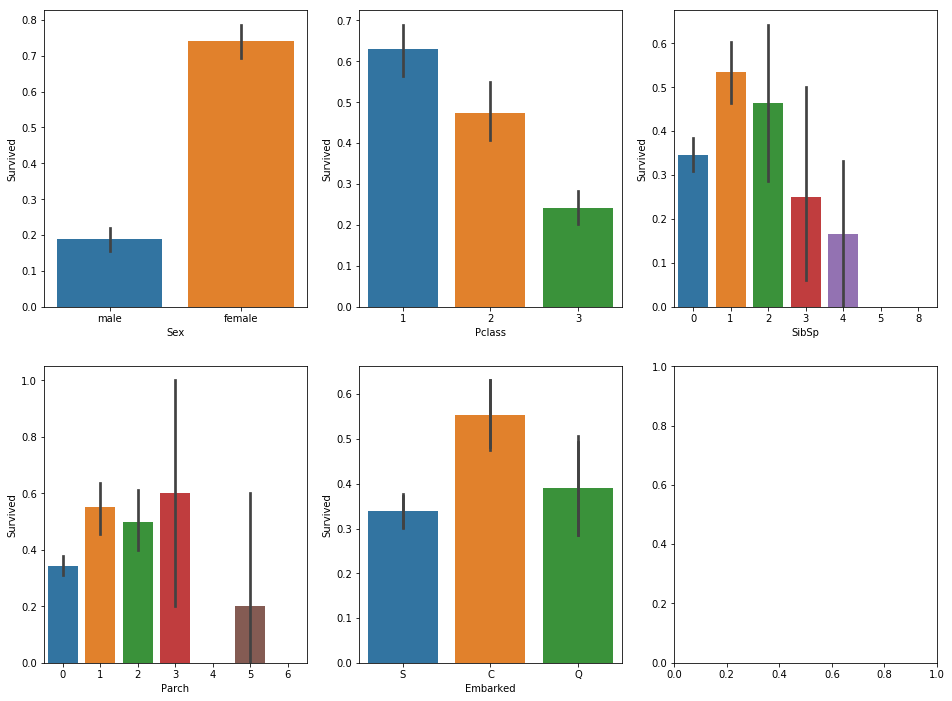

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, saxis = plt.subplots(2, 3,figsize=(16,12))
sns.barplot(x="Sex", y="Survived", data=input_dataframe, ax = saxis[0,0]);
sns.barplot(x="Pclass", y="Survived", data=input_dataframe, ax = saxis[0,1]);
sns.barplot(x="SibSp", y="Survived", data=input_dataframe, ax = saxis[0,2]);
sns.barplot(x="Parch", y="Survived", data=input_dataframe, ax = saxis[1,0]);
sns.barplot(x="Embarked", y="Survived", data=input_dataframe, ax = saxis[1,1]);
sns.barplot(x="Embarked", y="Survived", data=input_dataframe, ax = saxis[1,1]);



- Yeah girls are the total survivors :)
- So the better the class, the higher is the probability to survive
- Whiskers indicate variability outside the upper and lower quartiles -> "SibSp" is not always conclusive, i.e. SibSp

In [ ]:
sns.displot(x = 'Age', hue = 'Survived',  data=input_dataframe, binwidth=3, ax = saxis[1,2] )

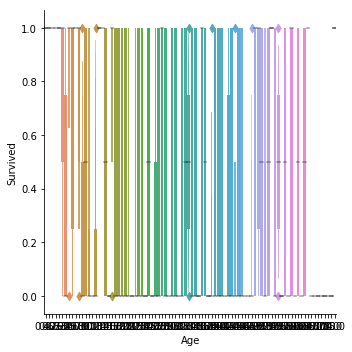

In [34]:
### need to put it in bins, and for that we have to update seaborn to v 0.11 to use displot and histplot
sns.catplot(x = 'Age', y = 'Survived',  data=input_dataframe, kind="boxen" );

In [ ]:
matX = input_dataframe[["Pclass","Sex", "Age", "SibSp", "Parch","Fare", "Cabin", "Embarked"]]

In [ ]:
from sklearn import model_selection
labels = input_dataframe['Survived']
train, test, labels_train, labels_test = model_selection.train_test_split(matX, labels, random_state = 0)

In [ ]:
train.shape, test.shape, labels_train.shape, labels_test.shape

Read about http://xgboost.readthedocs.io/en/latest/model.html

In [38]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# the methods to look into during comparison
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),    
    ]